Text(0, 0.5, '특성 1')

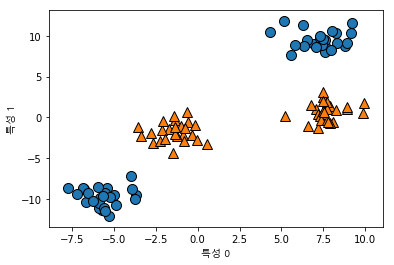

In [10]:
#p570 SVM

from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import matplotlib as mpl
import matplotlib.font_manager as fm


from sklearn.datasets import make_blobs

X,y=make_blobs(centers=4, random_state=8)
y=y%2

mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("특성 0",FontProperties=fontprop)
plt.ylabel("특성 1",FontProperties=fontprop)




949
949


C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, '특성 1** 2')

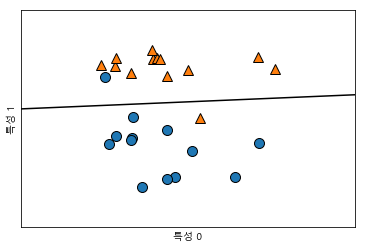

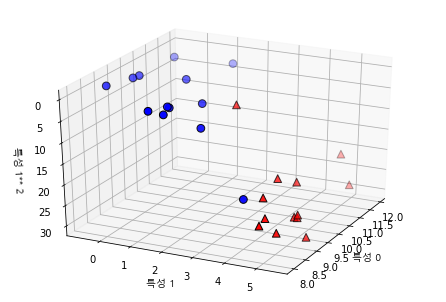

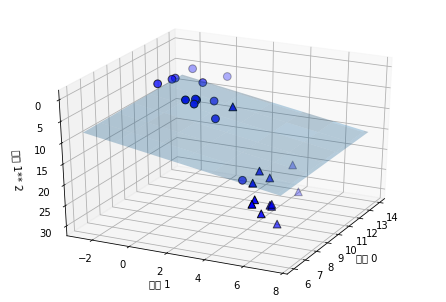

In [69]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import matplotlib as mpl
import matplotlib.font_manager as fm

#데이터포인트 나누기
from sklearn.svm import LinearSVC
Linear_svm=LinearSVC().fit(X,y)

mglearn.plots.plot_2d_separator(Linear_svm,X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("특성 0",FontProperties=fontprop)
plt.ylabel("특성 1",FontProperties=fontprop)








font_list= fm.findSystemFonts(fontpaths=None,fontext='ttf')

#ttf 폰트 전체개수

print(len(font_list))

font_list[:15]
f=[f.name for f in fm.fontManager.ttflist]
print(len(font_list))

#10개 폰트 명 만 출력
f[20:30]

[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Malgun' in f.name]

path= 'C://Windows//Fonts//Malgun.ttf'

fontprop=fm.FontProperties(fname=path, size=10)


# p582 두번째 특성 제곱하여 추가

X_new=np.hstack([X,X[:,1:]**2])

from mpl_toolkits.mplot3d import Axes3D,axes3d
figure=plt.figure()

#3차원 그래프

ax=Axes3D(figure,elev=-152, azim= -26)

#y == 0 인 포인트를 먼저 그리고 그 다음 y==1 인 포인트를 그림

mask=y ==0

ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b',cmap=mglearn.cm2,s=60,edgecolor='k')

ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',marker='^', cmap=mglearn.cm2,s=60,edgecolor='k')

ax.set_xlabel("특성 0",FontProperties=fontprop)
ax.set_ylabel("특성 1",FontProperties=fontprop)
ax.set_zlabel("특성 1** 2",FontProperties=fontprop)


#p583  위

Linear_svm_3d =LinearSVC().fit(X_new,y)
coef,intercept=Linear_svm_3d.coef_.ravel(),Linear_svm_3d.intercept_

#선형 결정 경계 그리기

figure=plt.figure()
ax=Axes3D(figure,elev=-152,azim=-26)
xx=np.linspace(X_new[:,0].min()- 2, X_new[:,0].max() +2 , 50)
yy=np.linspace(X_new[:,1].min()- 2, X_new[:,1].max() +2 , 50)

XX,YY= np.meshgrid(xx,yy)
ZZ=(coef[0]* XX+ coef[1] * YY +intercept)/ -coef[2]
ax.plot_surface(XX,YY,ZZ,rstride=8, cstride=8 , alpha=0.3)
ax.scatter(X_new[mask,0], X_new[mask,1], X_new[mask,2], c='b', cmap=mglearn.cm2, s=60, edgecolor= 'k')
ax.scatter(X_new[~mask,0], X_new[~mask,1], X_new[~mask,2], c='b',marker='^', cmap=mglearn.cm2, s=60, edgecolor= 'k')

ax.set_xlabel("특성 0")
ax.set_ylabel("특성 1")
ax.set_zlabel("특성 1** 2")




Text(0, 0.5, '특성 1')

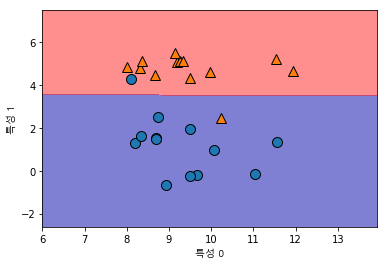

In [70]:
#p583 아래  위에서 투형하기

ZZ=YY**2
dec=Linear_svm_3d.decision_function(np.c_[XX.ravel(),YY.ravel(),ZZ.ravel()])

plt.contourf(XX,YY,dec.reshape(XX.shape),levels=[dec.min(),0,dec.max()],cmap=mglearn.cm2,alpha=0.5)

mglearn.discrete_scatter(X[:,0],X[:,1],y)

plt.xlabel("특성 0",FontProperties=fontprop)
plt.ylabel("특성 1",FontProperties=fontprop)

C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


949
949


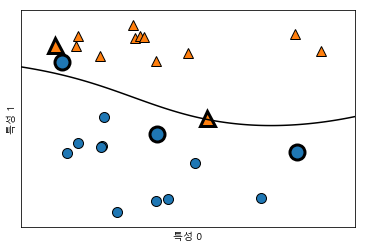

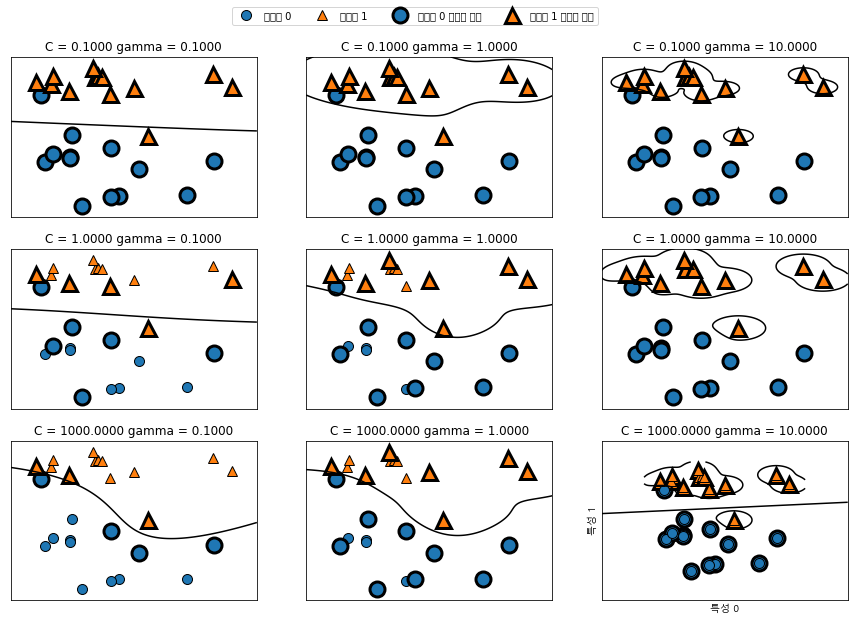

In [72]:
#p585  svm 이해

from sklearn.svm import SVC

X,y=mglearn.tools.make_handcrafted_dataset()
svm=SVC(kernel='rbf', C=10 , gamma=0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm,X,eps=.5)

#데이터 포인트 그리기

mglearn.discrete_scatter(X[:,0],X[:,1],y)

#서포트 벡터

sv=svm.support_vectors_

#dual_coef_ 부호에 의해 서포트 벡터의 클래스 레이블이 결정

sv_labels= svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:,0],sv[:,1],sv_labels,s=15, markeredgewidth=3)

plt.xlabel("특성 0",FontProperties=fontprop)
plt.ylabel("특성 1",FontProperties=fontprop)


#p586 매캐변수 튜닝

fig,axes=plt.subplots(3,3,figsize=(15,10))

for ax,C in zip(axes,[-1,0,3]):
    for a, gamma in zip(ax, range(-1,2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma,ax=a)
        
axes[0,0].legend(["클래스 0","클래스 1 ","클래스 0 서포트 벡터",
                  "클래스 1 서포트 벡터"], ncol=4,loc=(.9,1.2))

#한글 적용
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import matplotlib as mpl
import matplotlib.font_manager as fm

#데이터포인트 나누기
from sklearn.svm import LinearSVC
Linear_svm=LinearSVC().fit(X,y)

mglearn.plots.plot_2d_separator(Linear_svm,X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("특성 0",FontProperties=fontprop)
plt.ylabel("특성 1",FontProperties=fontprop)


font_list= fm.findSystemFonts(fontpaths=None,fontext='ttf')

#ttf 폰트 전체개수

print(len(font_list))

font_list[:15]
f=[f.name for f in fm.fontManager.ttflist]
print(len(font_list))

#10개 폰트 명 만 출력
f[20:30]

[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Malgun' in f.name]

path= 'C://Windows//Fonts//Malgun.ttf'

fontprop=fm.FontProperties(fname=path, size=10)

949
949
훈련 세트 정확도 : 1.00
테스트 세트 정확도 : 0.63


C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


특성별 최솟값 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최대값 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


TypeError: 'FontProperties' is an invalid keyword argument for this function

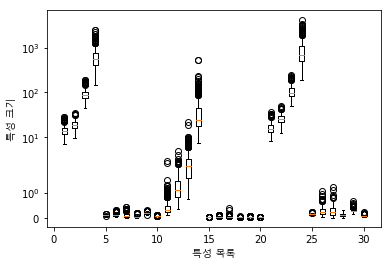

In [74]:
#p588 svm 암데이터  / c=1, gamma=1 / n_features

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

#한글 적용
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import matplotlib as mpl
import matplotlib.font_manager as fm

#ttf 폰트 전체개수

print(len(font_list))

font_list[:15]
f=[f.name for f in fm.fontManager.ttflist]
print(len(font_list))

#10개 폰트 명 만 출력
f[20:30]

[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Malgun' in f.name]

path= 'C://Windows//Fonts//Malgun.ttf'

fontprop=fm.FontProperties(fname=path, size=10)

cancer=load_breast_cancer()
X_train, X_test , y_train, y_test= train_test_split(cancer.data, cancer.target, random_state=0)

#-----------------------

svc=SVC()

svc.fit(X_train,y_train)

print("훈련 세트 정확도 : {:.2f}".format(svc.score(X_train, y_train)))

print("테스트 세트 정확도 : {:.2f}".format(svc.score(X_test, y_test)))


#p588 svm 암데이터  최솟값 최댓값 로그 스케일로

plt.boxplot(X_train,manage_xticks=False)
plt.yscale("symlog")
plt.xlabel("특성 목록",FontProperties=fontprop)
plt.ylabel("특성 크기",FontProperties=fontprop)



#훈련 세트ㅔ서 특성별 최솟값 계산
min_on_training = X_train.min(axis=0)

#훈련 세트엥서 특성별 (최대값- 최솟값 ) 범위 계산
range_on_training= (X_train- min_on_training).max(axis=0)

#훈련 데이터에 최솟값을 빼고 범위로 나누면 각 특성에 대해 최솟값은 0 최대값은 1

X_train_scaled= (X_train-min_on_training)/ range_on_training
print("특성별 최솟값 \n", X_train_scaled.min(axis=0))
print("특성별 최대값 \n", X_train_scaled.max(axis=0))


#p589  데이터 전처리
X_test_scaled= (X_test - min_on_training) / range_on_training

svc=SVC()
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}". format(svc.score(X_train_scaled,y_train)),FontProperties=fontprop)
print("테스트 세트 정확도: {:.3f}". format(svc.score(X_test_scaled,y_test)),FontProperties=fontprop)